# Neural Networks

### BUSI 520 - Python for Business Research
### Kerry Back, JGSB, Rice University

### Multi-layer perceptrons

* A multi-layer perceptron (MLP) consists of "neurons" arranged in layers.
* A neuron is a mathematical function.  It takes inputs $x_1, \ldots, x_n$, calculates a function $y=f(x_1, \ldots, x_n)$ and passes $y$ to the neurons in the next level.
  * The inputs in the first layer are the features.
  * The inputs in successive layers are the calculations from the prior level. 
* The last layer is a single neuron that produces the output.
* "Input layer" doesn't do anything. "Output layer" is last layer.  Others are called "hidden layers."


### Illustration

![](images/Neural-Nets-Transparent.png)

- inputs $x_1, x_2, x_3, x_4$
- variables $y_1, \ldots, y_5$  are calculated in hidden layer
- output depends on $y_1, \ldots, y_5$

### Rectified linear units

- The usual function for the neurons (except in the last layer) is 

$$ y = \max(0,b+w_1x_1 + \cdots + w_nx_n)$$

- Parameters $b$ (called bias) and $w_1, \ldots w_n$ (called weights) are different for different neurons. 
- This function is called a rectified linear unit (RLU).  
- Analogous to neurons firing in brain:
  - $y>0$ only when $\sum w_ix_i$ is large enough. 
  - A neuron  fires when it is sufficiently stimulated by signals from other neurons.

### Output neuron

- The output doesn't have a truncation.
- For regression problems, it is linear:

$$z = b+w_1y_1 + \cdots + w_ny_n$$ 

- For classification, there is a linear function for each class and predicted probabilities are (called softmax):
$$ \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}}$$ 

### Deep versus shallow learning

- Deep learning means a neural network with  many layers.  It is behind facial recognition, self-driving cars, ...
- Giu, Kelley & Xiu: shallow learning seems to work better for predicting stock returns
- Probably due to low signal to noise ratio


### Neural net libraries

* Sci-kit learn (for small problems, CPU)
* Tensorflow from Google (CPU or GPU)
* Torch from Facebook (pytorch = python version, CPU or GPU)
* cuml from Nvidia (for GPU)

![](neuralnet.png)

### Example

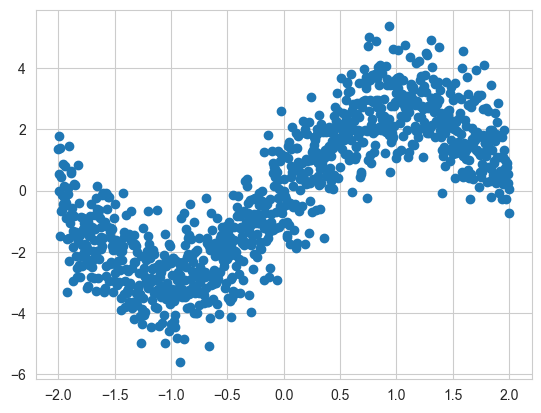

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("whitegrid")

# some artificial data

np.random.seed(0)
size = 1000

x = np.linspace(-2, 2, size)
y = 2.9 * np.sin(1.5 * x) + np.random.normal(size=size)

# view data
plt.scatter(x, y)
plt.show()

### Split into train and test

In [2]:
from sklearn.model_selection import train_test_split

X = x.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

### Define a model and train

In [3]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(
  hidden_layer_sizes=(16, 8, 4),
  random_state=0,
  max_iter=2000
)
model.fit(X_train, y_train)
print(f"R-squared on test data is {model.score(X_test, y_test)}")

R-squared on test data is 0.8320034104090129


### View

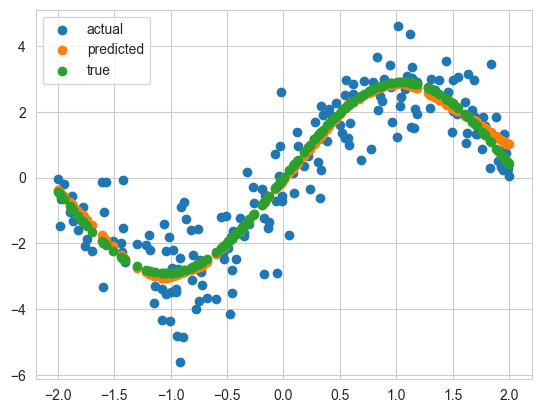

In [4]:
# actual y's
plt.scatter(X_test, y_test, label="actual")

# predicted y's
y_hat = model.predict(X_test)
plt.scatter(X_test, y_hat, label="predicted")

# true y's (without noise)
y_true = 2.9 * np.sin(1.5 * X_test)
plt.scatter(X_test, y_true, label="true")

plt.legend()
plt.show()

### Nonparametric estimation

- We got a similar good fit using nonlinear least squares in the last class.
- But, then we input the correct functional form $a\cdot \sin(bx)$ and only had to estimate $a$ and $b$.
- Here, we input no functional form and let the neural net figure it out.

### Compare different network configurations

In [5]:
import pandas as pd  

networks = [
    (4,),
    (8,),
    (16,),
    (32,),
    (64,),
    (8, 4),
    (16, 8, 4),
    (32, 16, 8, 4),
    (64, 32, 16, 8, 4),
]

dct = {}
for n in networks:
    model = MLPRegressor(
        hidden_layer_sizes=n, random_state=0, max_iter=2000
    )
    model.fit(X_train, y_train)
    dct[n] = model.score(X_test, y_test)
print(pd.Series(dct))

4     0.791647
8     0.828308
16    0.832089
32    0.833226
64    0.832105
8     0.803791
16    0.832003
32    0.794628
64    0.832195
dtype: float64


### Ask Julius 

- to get the California house price data and 
  - split into train, validate, and test
  - fit an MLP regressor with different network structures on the training data and compute R2's on the validation data
  - fit the best model on the training and validation data and compute R2 on the test data
- to repeat with an MLP classifier on the breast cancer data 
  - use accuracy instead of R2 to select the best model
  - compute the confusion matrix on the test data 


## Overview of fitting a neural network

* A neural network is a composite function.  Let $\theta$ denote all of the bias and weight parameters.  Consider observation $i$ with target $y_i$ and features $x_i$.  Denote the
prediction by $h(x_i, \theta)$.  
* In regression, we want to minimize 
$$ \frac{1}{2} \text{SSE} = \frac{1}{2}\sum_{i=1}^n [y_i - h(x_i, \theta)]^2.$$
* The gradient with respect to $\theta$ is 
$$ \sum_{i=1}^n [y_i - h(x_i, \theta)] \nabla_\theta h(x_i, \theta)$$

### Composite function

* Simplifying a bit, suppose there is only a single hidden layer with a single neuron. 
* Let $\theta = (\theta_1, \theta_2)$ where $\theta_1$ denotes the parameters of the
hidden layer neuron and $\theta_2$ denotes the parameters of the output layer.
* Let $y_i = f(x_i, \theta_1)$ denote the output of the neuron in the hidden layer.
* Let $z_i$ denote the prediction.  It is generated by the output layer depending on $y_i$.  Denote this dependence by $z_i = g(y_i, \theta_2)$.
* In other words, $h$ is the cmposite function $g \circ f$, meaning
$$h(x_i, \theta) = g(f(x_i, \theta_1), \theta_2)$$

### Chain Rule

* The gradient of $h$ in $\theta_2$ is
$$\nabla_{\theta_2} h(x_i, \theta) = \nabla_{\theta_2} g(y_i, \theta_2)$$
* The gradient of $h$ in $\theta_1$ is
$$\nabla_{\theta_1} h(x_i, \theta) = \frac{\partial g(y_i, \theta_2)}{\partial y_i}\nabla_{\theta_1} f(x_i, \theta_1)$$

### Gradient descent

* In a forward pass, the outputs of all the neurons are calculated, given the parameters.
- The gradients with respect to the parameters are calculated at the same time the functions are calculated.
* In the backward pass, the gradients are multiplied together as prescribed by the chain rule to get the overall derivative.
* Once the overall derivative is known, $\theta$ is adjusted by taking a step in the opposite direction of the gradient (gradient descent).

### Automatic differentiation

- A standard way to numerically calculate a derivative is to choose a small $\epsilon$ and calculate 
$$\frac{f(x + \epsilon) - f(x-\epsilon)}{2\epsilon}$$
- But there is a better way: automatic differentiation.
- Available in pytorch and tensorflow though not scikit-learn.

From Wikipedia: 

Automatic differentiation exploits the fact that every computer calculation, no matter how complicated, executes a sequence of elementary arithmetic operations (addition, subtraction, multiplication, division, etc.) and elementary functions (exp, log, sin, cos, etc.). By applying the chain rule repeatedly to these operations, partial derivatives of arbitrary order can be computed automatically, accurately to working precision, and using at most a small constant factor of more arithmetic operations than the original program.

### Mini-batch gradient descent

* The overall gradient is a sum over all training samples:
$$ \sum_{i=1}^n [y_i - h(x_i, \theta)] \nabla_\theta h(x_i, \theta)$$
* Should we wait until we have added all of these together before taking a step?
* Instead, add up 100, take a small step, add up another 100, etc. (or different number than 100).
* After going through all observations, shuffle them and start again (called a new epoch).

### Stochastic gradient descent

- Batch size = 1 is called stochastic gradient descent.
- This means that the gradient is calculated and a step is taken for each observation.
- This is probably the most common way to train a neural network.

## Neural net libraries

* Tensorflow from Google
* Torch from Facebook (pytorch = python version)

## Pytorch tensors

In [6]:
import torch

# Creating a tensor from a list
tensor_from_list = torch.tensor([1, 2, 3, 4, 5])

# Creating a tensor from a numpy array
numpy_array = np.array([6, 7, 8, 9, 10])
tensor_from_numpy = torch.from_numpy(numpy_array)

# Creating a 2x3 matrix filled with zeros
zeros_tensor = torch.zeros(2, 3)

# Creating a 2x3 matrix filled with ones
ones_tensor = torch.ones(2, 3)

# Displaying the created tensors
tensor_from_list, tensor_from_numpy, zeros_tensor, ones_tensor

OSError: [WinError 126] The specified module could not be found. Error loading "c:\Users\kerry\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

## Automatic Differentiation

Automatic differentiation is a key feature in PyTorch that enables the computation of gradients for tensor operations. This is essential for training neural networks using gradient-based optimization algorithms.

In PyTorch, the `autograd` package provides automatic differentiation capabilities. When a tensor has its `requires_grad` attribute set to `True`, any operation performed on that tensor will be tracked, and we can later compute the gradient of that operation with respect to the tensor.

In [11]:
# Creating a tensor and setting requires_grad to True
x = torch.tensor(2.0, requires_grad=True)

# Defining a simple function
y = x ** 2

# Computing the gradient
y.backward()

# Displaying the gradient dy/dx at x = 2
x.grad

tensor(4.)

### Automatic differentiation of a composite function

In [12]:
x = torch.tensor(2.0, requires_grad=True)

# Defining a simple composite function
y = x ** 2
z = 3 * y

# Computing the gradient
z.backward()

# Displaying the gradient dz/dy * dy/dx at x = 2
x.grad

tensor(12.)

## Pytorch example (sklearn's wine dataset)

In [13]:
# Load the wine dataset
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)
print(f"(numobs, numfeatures) = {X.shape}")
print(f"(unique values of y are {np.unique(y)})")

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(numobs, numfeatures) = (178, 13)
(unique values of y are [0 1 2])


### Scale the data

Notice that we fit the transform on the training data.  We then apply the fitted transform to the test data.  This is how a scikit-learn pipeline works too.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Convert to tensors

In [15]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.int64)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)

### Define a network structure

In [16]:
import torch.nn as nn
import torch.nn.functional as F

class WineClassifier(nn.Module):
    def __init__(self):
        super(WineClassifier, self).__init__()  # inherit from nn.Module
        # Define the layers
        self.layer1 = nn.Linear(13, 64)  # Hidden layer 1
        self.layer2 = nn.Linear(64, 32)  # Hidden layer 2
        self.layer3 = nn.Linear(32, 16)  # Hidden layer 3
        self.out = nn.Linear(16, 3)      # Output layer

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = self.out(x)
        return F.log_softmax(x, dim=1)

In [17]:
# Instantiate the model
model = WineClassifier()
model

WineClassifier(
  (layer1): Linear(in_features=13, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=3, bias=True)
)

### Define a loss function and optimizer

In [18]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

### Train

In [19]:
num_epochs = 100
losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    losses.append(loss.item())

    # Zero the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update the parameters
    optimizer.step()

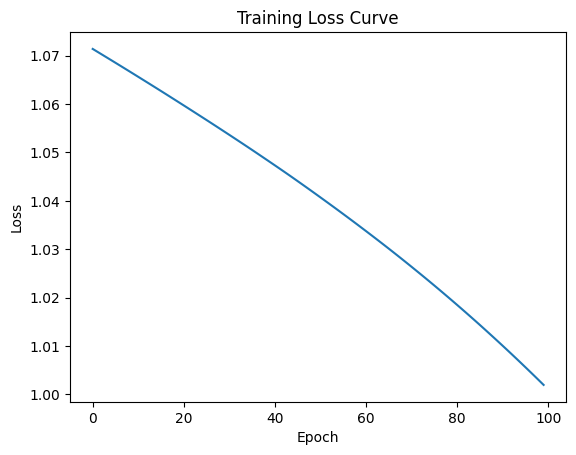

In [20]:
# Plot the loss curve

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

### Test

In [21]:
logprobs = model(X_test_tensor)
maxlogprob, yhat = torch.max(logprobs, 1) # 1 means max across rows
correct = (yhat == y_test_tensor).sum().item()
accuracy = correct / len(y_test_tensor)
accuracy

0.6111111111111112